<a href="https://colab.research.google.com/github/SpellOnYou/CLab21/blob/main/Data-exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
!cp -R /gdrive/MyDrive/2021/CLTeamLAB/2021-04-19/tl2021 /content

In [1]:
from pathlib import Path
data_path = Path('/content/tl2021/')

In [2]:
# ! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
from fastai.text.all import *

## Restaurants

- convert files to csv

In [3]:
food_path = data_path/'restaurants'

In [4]:
list(food_path.iterdir())

[Path('/content/tl2021/restaurants/menu_dev-predicted.txt'),
 Path('/content/tl2021/restaurants/menu_test.txt'),
 Path('/content/tl2021/restaurants/menu_dev.txt'),
 Path('/content/tl2021/restaurants/menu_train.txt')]

In [5]:
for f in food_path.iterdir():
    !wc {f}

 606  607 1710 /content/tl2021/restaurants/menu_dev-predicted.txt
    606  410328 2951692 /content/tl2021/restaurants/menu_test.txt
    606  387336 2777016 /content/tl2021/restaurants/menu_dev.txt
    4859  3112313 22249469 /content/tl2021/restaurants/menu_train.txt


In [6]:
import pandas as pd

In [10]:
with open(food_path/'menu_train.txt') as f:
    lines = []
    for line in f.readlines():
        lines += [line.split('\t')]

train_df = pd.DataFrame(lines)
train_df.head()
train_df.to_csv('/content/train.csv')

In [11]:
train_df[4].unique()

array(["squid tofu lunch cooked squid tofu vegetables with seasoned soy sauce;edamame broiled green soybeans;hotate scallop;oyako don dinner chicken vegetables and egg cooked with sweet seasoned soy sauce over rice;kitsune dinner noodles with fried bean cake;gomae spinach with sesame sauce;zaru soba lunch cold buckwheat noodle served with cold soba sauce;sashimi thinly sliced tuna;unajyu lunch barbecued eel served over rice;new york roll shrimp avocado;colorfull roll maguro hamachi sake tobiko shrio maguro abi hirame unagi crab avocado sprout cucumber;saba mackerel;tekka red tuna maki;broiled chicken teriyaki dinner;white tuna special dinner albacore sashimi tekka don;curry udon lunch homemade curry with japanese white noodles;tempura dinner deep fried prawns and vegetables;saba teriyaki lunch;tamago cooked egg;ama ebi sweet shrimp;ginger yaki lunch sliced beef cooked with a shoga ginger seasoned sauce;nasu hasamiyaki lunch sliced beef japanese eggplant broiled with ginger seasoned sau

### Only use text column

In [12]:
dls = TextDataLoaders.from_df(train_df, path='/content', text_col=4, label_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [12]:
dls.show_batch()

,text,category
0,xxbos california 's with angel hair with marinara sauce sauteed fresh tomatoes fresh basil in a marinara sauce;chicken sundried tomatoes wrap grilled chicken sundried tomatoes lettuce tomatoes and vinaigrette;sausage roll italian sweet sausage peppers onions cheese;garlic burger lb sandwich burger topped w black olivers and fresh garlic;baked ziti ziti ricotta cheese marinara sauce melted mozzarella cheese;spinach alfredo pizza medium cheese ricotta cheese garlic and spinach no xxunk sticks group order full tray people served w marinara sauce individual sm in plate for group order half tray people for group order full tray people xxunk grilled chicken individual order sm xxunk fresh mozzarella pizza with a touch of red sauce;veal hero deep fried in veggie oil served with lettuce tomatoes and vinaigrette on a hero;fried xxunk parmigiana individual order w xxunk extra regular topping xxunk burger with cheese deluxe carrots green beans sweet peas yellow onions canola oil wheat xxunk salad,$
1,xxbos hearty veg minestrone bowl;garden pizza sm fresh vegetables with red sauce or white sauce for an au gratin effect with regular or whole wheat xxunk chicken steak sandwich with deluxe xxunk chicken xxunk jack cheese xxunk parmigiana with xxunk joe pizza ind chili chopped beef hot dogs onions green peppers grated cheese;florentine pizza sm spinach feta cheese with grated cheese mozzarella;pesto pizza pesto sauce with corn vine ripe yellow red tomatoes fresh mozzarella in xxunk pizza sm chili con carne onions green peppers green cheese;lamb gyro lettuce tomato onion feta cucumber in pita honey mustard sauce with chicken tsatsiki with lamb also piaz salad chick peas beans beets or todays soup xxunk deluxe crabcake burger with lobster sauce with real maryland xxunk nick angus burger with melted swiss cheese fried mushrooms carmelized onions and fresh tomato on grilled thick challah bread served with seasoned waffle xxunk play sandwich three,$$
2,xxbos mediterranean plate tuscan white bean hummus feta topped with extra virgin olive oil and a greek salad served with traditional pizza pita bread;sesame ginger chicken dumplings sesame ginger chicken inside delicate wonton xxunk with a mild soy ginger chili sauce topped with toasted sesame seeds and xxunk wraps with chicken minced chicken and shrimp wok seared with shitake mushrooms water chestnuts green onions in a soy ginger sauce served on a bed of crispy rice noodles with a side of spicy chili ginger sauce;herb onion focaccia with checca italian xxunk herb onion pizza bread hearth baked and served with a combination of fresh roma tomatos basil garlic and extra virgin olive xxunk bbq steak tacos korean steak napa cabbage romaine onions scallions and cilantro served with corn tortillas spicy chili sauce and sesame xxunk spring rolls choose any two flour tortilla sprinkled with herbs and baked in our pizza,$$
3,xxbos the continental breakfast fresh baked bagels pastries and croissants served with cream cheese spread butter and preserves plus orange juice and coffee xxunk octopus sushi;vegetable lover wrap platters x large;pasta with veal cutlet xxunk strips served with fries and choice of salad or cole xxunk your own pizza large;homemade cheeseburger plate served with fries onion rings and cole xxunk ga chicken noodle soup large noodle soup with natural chicken broth and shredded chicken xxunk lover wrap platter large;beef with lobster sauce small;tuna xxunk maki pcs soft shell crab avocado cucumber and xxunk tai gan sach noodle soup x large noodle soup with eye round steak soft tendons and beef xxunk parmigiana pasta xxunk goo gai pan xxunk gau beef;pho chin nam noodle soup large noodle soup with well done eye round xxunk chien hai san prepared with shrimp crab meat squid and fish cake;bun chao tom nem nuong grilled,$$$
4,xxbos the chi town tasting plate buffalo wings crispy cheese dippers onion strings chicken thumbs and fries with three dipping sauces all natural marinara bl

In [16]:
??accuracy

In [13]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [14]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.211792,1.036851,0.580247,00:19


epoch,train_loss,valid_loss,accuracy,time
0,0.948418,1.016564,0.600823,00:39
1,0.872113,0.960301,0.618313,00:39
2,0.784860,0.878018,0.652263,00:39
3,0.709740,0.913991,0.637860,00:39


### Add restaurants name & region

In [ ]:
dls = TextDataLoaders.from_df(train_df, path='/content', text_col=[1,2,3,4], label_col=0)

In [13]:
dls.show_batch()

,text,category
0,xxbos xxfld 1 xxmaj xxunk xxfld 2 pizza xxfld 3 nyc xxfld 4 california 's with angel hair with marinara sauce sauteed fresh tomatoes fresh basil in a marinara sauce;chicken sundried tomatoes wrap grilled chicken sundried tomatoes lettuce tomatoes and vinaigrette;sausage roll italian sweet sausage peppers onions cheese;garlic burger lb sandwich burger topped w black olivers and fresh garlic;baked ziti ziti ricotta cheese marinara sauce melted mozzarella cheese;spinach alfredo pizza medium cheese ricotta cheese garlic and spinach no xxunk sticks group order full tray people served w marinara sauce individual sm in plate for group order half tray people for group order full tray people xxunk grilled chicken individual order sm xxunk fresh mozzarella pizza with a touch of red sauce;veal hero deep fried in veggie oil served with lettuce tomatoes and vinaigrette on a hero;fried xxunk parmigiana individual order w xxunk extra regular topping xxunk burger with cheese deluxe,$
1,xxbos xxfld 1 xxup xxunk xxmaj express xxfld 2 pizza xxfld 3 boston xxfld 4 the continental breakfast fresh baked bagels pastries and croissants served with cream cheese spread butter and preserves plus orange juice and coffee xxunk octopus sushi;vegetable lover wrap platters x large;pasta with veal cutlet xxunk strips served with fries and choice of salad or cole xxunk your own pizza large;homemade cheeseburger plate served with fries onion rings and cole xxunk ga chicken noodle soup large noodle soup with natural chicken broth and shredded chicken xxunk lover wrap platter large;beef with lobster sauce small;tuna xxunk maki pcs soft shell crab avocado cucumber and xxunk tai gan sach noodle soup x large noodle soup with eye round steak soft tendons and beef xxunk parmigiana pasta xxunk goo gai pan xxunk gau beef;pho chin nam noodle soup large noodle soup with well done eye round xxunk chien hai san,$$$
2,xxbos xxfld 1 xxmaj domino 's xxmaj pizza xxfld 2 pizza xxfld 3 nyc xxfld 4 breadsticks pc breadsticks baked to golden brown includes marinara sauce for dipping;cheese pizza sm;buffalo chicken xl;buffalo chicken xxunk feast sm a mouthwatering combination of spicy pepperoni italian sausage green peppers fresh mushrooms onions and cheese;italian pepperoni salami ham topped with banana peppers green peppers onions provolone cheese;italian sausage marinara in a breadbowl penne pasta tossed with a meaty italian sausage smothered in zesty marinara sauce and topped with provolone cheese;italian sausage and peppers sliced italian sausage roasted red peppers green peppers banana peppers onions provolone cheese and tomato basil xxunk sticks breadsticks sprinkled with cinnamon sugar includes sweet vanilla xxunk sausage peppers sliced italian sausage roasted red peppers green peppers banana peppers onions provolone cheese and tomato basil marinara all on our artisan italian bread and baked to a golden xxunk bbq chicken small,$
3,xxbos xxfld 1 xxmaj typhoon xxmaj asian xxmaj bistro xxfld 2 sushi bars xxfld 3 boston xxfld 4 walnut shrimps battered then fried jumbo shrimps topped with spicy mayo and honey glazed walnuts served with steamed broccoli on crunchy noodles;happy family lunch a combination of scallops shrimps beef pork and chicken stir fried with veggies in brown sauce;sesame chicken lunch white meat battered fried and then stir fried with our sesame sauce served with xxunk pho lunch our version of vietnamese combo beef noodle soup served with bean sprouts basils and lemon;lobster sashimi lobster sashimi with no rice with lobster miso xxunk makimono regular sushi rolls or six pieces per roll available as temaki hand roll for the same price shrimps cucumber tobiko and spicy xxunk salmon lunch california maki topped with fresh salmon then blazed in our miso sauce by strong fire topped with caviar and scallions served with,$$
4,xxbos xxfld 1 xxmaj penang xxfld 2 otherasian xxfld 3 nyc xxfld 4 saigon black pepper beef stir fried with black pepper aspara

In [14]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [15]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.215243,0.950834,0.595679,00:19


epoch,train_loss,valid_loss,accuracy,time
0,0.930118,0.852575,0.624486,00:40
1,0.864404,0.770299,0.668724,00:41
2,0.781746,0.810437,0.670782,00:40
3,0.713050,0.745923,0.697531,00:41


 ### Add valid(dev?) data

In [107]:
def get_df(path, fname, sep='\t'):
    with open(path/fname) as f:
        lines = []
        for line in f.readlines():
            lines += [line.split(sep)]
    return pd.DataFrame(lines)

In [108]:
valid_df = get_df(food_path, 'menu_test.txt')
valid_df['is_valid'] = True

In [110]:
train_df = get_df(food_path, 'menu_dev.txt')
train_df['is_valid'] = False

In [111]:
train_df.head(2)

,0,1,2,3,4,is_valid
0,$,Sweetgreen,american (new),washington,baby arugula;wrap it up choose any combination o greens and goods then let us wrap it up;guacamole greens guac deconstructed mesclun with fresh avocado grilled chicken grape tomatoes red onion crushed tortilla chips topped with lime cilantro jalapeno vinaigrette served with warm bread;le parisien baby arugula with roasted turkey breast brie pears toasted almonds topped with champagne vinaigrette served with warm bread;old school favorites cobb plus caprese chinese chicken chicken caesar with parmesan crisp;the yogurt big plain tart choose any fruit crunch extra toppings live active culture...,False
1,$,Westside Coffee Shop II,coffee & tea,nyc,pig feet stew patitas de cerdo guisadas;beef soup sopa de res;pastrami;steak with onions;import beers;beef ox tail stew rabito guisado;combination no two tacos rice and beans salad;roast pork burrito;fried pork meat masita de cerdo frita;beef tripe soup sopa de mondongo;roast pork;combination no two quesadillas rice and beans salad;one enchilada;assorted tropical sodas;avocado or mixed aguacate o miixta;combination no one nacho one enchilada rice and beans salad;rice with chicken arroz con pollo;pork soup sancocho de cerdo;lettuce and tomato lechuga y tomate;combination no one empanada one...,False


In [112]:
df = train_df.append(valid_df)

`
TextDataLoaders.from_df(df, path='.',  seed=None, text_col=0, label_col=1, label_delim=None, y_block=None, text_vocab=None, is_lm=False, valid_col=None, tok_tfm=None, tok_text_col='text', seq_len=72, backwards=False, bs=64, val_bs=None, shuffle=True, device=None)
`

In [142]:
series_len = lambda x: len(set([j for i in df[x].to_list() for j in i.split()]))

In [149]:
sum(map(series_len, range(1, 5)))

80519

In [23]:
dls = TextDataLoaders.from_df(df, path='.', text_col = [1,2,3,4], label_col = 0, valid_col='is_valid')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [26]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [25]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.446142,1.318202,0.487644,00:06


epoch,train_loss,valid_loss,accuracy,time
0,1.237009,1.353090,0.471170,00:09
1,1.173328,1.140795,0.606260,00:09
2,1.084859,1.065472,0.599671,00:09
3,1.015343,1.151057,0.574959,00:09


In [38]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.05754399299621582)

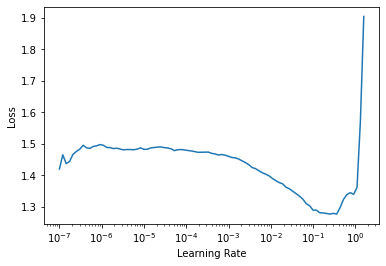

In [29]:
learn.lr_find()

In [39]:
learn.fine_tune(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.390434,1.243273,0.551895,00:06


epoch,train_loss,valid_loss,accuracy,time
0,1.240077,1.247108,0.515651,00:09
1,1.171072,1.102494,0.607908,00:09
2,1.124320,1.147660,0.537068,00:09
3,1.055442,1.141671,0.560132,00:09
4,0.982529,1.269052,0.542010,00:09
5,0.892246,1.218387,0.558484,00:09
6,0.806667,1.207285,0.565074,00:09
7,0.735402,1.162404,0.584844,00:09
8,0.675453,1.127523,0.584844,00:09
9,0.621444,1.143513,0.583196,00:09


- validation set을 따로 안쓰고 그냥 train에서 valid split한게 performance가 좋은데..?

## Emotions

In [36]:
emo_path = data_path/'emotions/isear'

In [63]:
for f in emo_path.iterdir():
    !wc {f}

  1150  18272 100209 /content/tl2021/emotions/isear/isear-val-prediction.csv
  1150  25264 139578 /content/tl2021/emotions/isear/isear-val.csv
  5365 116896 648269 /content/tl2021/emotions/isear/isear-train.csv
  1150  25451 140511 /content/tl2021/emotions/isear/isear-test.csv


- datasets are not clearly seperated

In [55]:
labels = ['joy', 'fear', 'shame', 'disgust', 'guilt', 'anger', 'sadness']
with open(emo_path/'isear-train.csv') as f:
    for num, line in enumerate(f):
        if line.split(',', maxsplit=1)[0] not in labels:
            print(num, line, end ='')

118 "
311 Note: for GUILT go to record n¦231"
1771 but I felt that I was not able to express myself very well - I felt ashamed and blushed."
2325 "
2601 B) Description of a disfigured orphaned child in Hiroshima calling for her mother."
2660 "
4368 "
5069 NB: In Bulgarian schools ""a three"" is the second worst mark."
5176 
5263 "


In [82]:
def get_df(path, fname, sep='\t'):
    with open(path/fname) as f:
        lines = []
        for line in f.readlines():
            if line.split(sep, maxsplit=1)[0] in labels:
                lines += [line.strip().split(sep, maxsplit=1)]
    return pd.DataFrame(lines)

In [83]:
train_df = get_df(emo_path,'isear-train.csv', sep=','); train_df.head()

,0,1
0,joy,When I understood that I was admitted to the University.
1,fear,"""I broke a window of a neighbouring house and I feared my mother's judgement and action on what I had done."""
2,joy,Got a big fish in fishing.
3,fear,"""Whenever I am alone in a dark room, walk alone on the street, sleep alone in the room at night or see something which is only partly visible. This emotion was very strong when as an 8 year old child I saw something horrible. """
4,shame,"""I bought a possible answer to a homework problem which was completely inapplicable to the question due to my not having read about the subject matter."""


In [76]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5355 entries, 0 to 5354
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5355 non-null   object
 1   1       5355 non-null   object
dtypes: object(2)
memory usage: 83.8+ KB


In [89]:
valid_df = get_df(emo_path,'isear-val.csv', sep=','); valid_df.head(1)

,0,1
0,joy,"""On holiday, seeing the lanscape in Gerona."""


In [90]:
train_df['is_valid'], valid_df['is_valid'] = False, True

In [93]:
df = train_df.append(valid_df); df.head(1)

,0,1,is_valid
0,joy,When I understood that I was admitted to the University.,False


In [94]:
dls = TextDataLoaders.from_df(df, path='.', text_col = 1, label_col = 0, valid_col='is_valid')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [95]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [96]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.699388,1.493616,0.432056,00:04


epoch,train_loss,valid_loss,accuracy,time
0,1.471859,1.311871,0.503484,00:05
1,1.283499,1.183593,0.572300,00:05
2,1.090551,1.100471,0.606272,00:05
3,0.902725,1.092146,0.613240,00:05


- less dropout, more epochs

In [97]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.2, metrics=accuracy)

SuggestedLRs(lr_min=0.03630780577659607, lr_steep=0.002511886414140463)

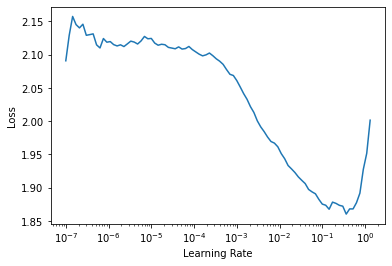

In [99]:
learn.lr_find()

In [100]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.680050,1.522598,0.434669,00:04


epoch,train_loss,valid_loss,accuracy,time
0,1.401870,1.416720,0.480836,00:05
1,1.317879,1.328008,0.522648,00:05
2,1.181824,1.312565,0.512195,00:05
3,1.047814,1.212164,0.555749,00:05
4,0.873537,1.231705,0.567944,00:05
5,0.710695,1.221622,0.581010,00:05
6,0.572784,1.252100,0.581010,00:05
7,0.482449,1.263863,0.581010,00:05
8,0.395472,1.271905,0.581010,00:05
9,0.376280,1.254811,0.578397,00:05


## check vocab

In [101]:
df.columns

Index([0, 1, 'is_valid'], dtype='object')

In [106]:
len(set(' '.join(df[1].to_list()).split()))

14210